# DS3000 Day 11

Oct 30/31, 2024

Admin
- For next Tuesday's class: I promise there will not be an in-class assignment, and remember that I record every lecture from the Monday section, so you can catch up with that recording, if you need our class time to go do your civic duty.
- Homework 4 assigned (last one!), due **Tuesday, Nov. 19**
- Phase III of the project will be due **Friday, Nov. 22** (Group submission to Gradescope, see ProjectGuidelines on Canvas)
  - One of the TAs has put together a helpful [Intro to Git](https://mountainous-tomato-578.notion.site/Useful-Git-Stuff-1202deb51ce8807394abe987a19e1996) guide, if anyone is interested in learning how to use it at a basic level
  - It may also be helpful to remind/learn a bit about [version control](https://ourcodingclub.github.io/tutorials/git/)
- Lab 4 will be **Wed/Thur, Nov. 13/14**

Push-Up Tracker
- Section 03: 8
- Section 05: 9

Content:
- Ethics in Machine Learning Exercise
- Linear Regression

In [1]:
# packages used so far + some new for today
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
import math

## Previously: Projections and The Line of Best Fit

We now have (almost) all the tools we need to learn our first machine learning model, **linear regression**. But what *is* linear regression? At it's most basic level, it's about finding a line that best represents the relationship between two numeric features, $x$ and $y$, where we usually say the goal is to ``predict $y$ with $x$". You may recall this fun thing:

$$y = mx + b$$

From your pre-uni days. What is this, actually though? There are a couple ways to look at it. First, consider that $y$ and $x$ are vectors, then:

$$y = mx + b \Rightarrow \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix} = m \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix} + b$$

If you consider that $b = b\times1$, then you could also write:

$$\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix} = m \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix} + b \Rightarrow \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix} = m \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix} + b\begin{bmatrix} 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}$$

Or, one last step and we can see that this is the same thing as:

$$\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix} = \begin{bmatrix} x_1 & 1 \\ x_2 & 1 \\ \vdots \\ x_n & 1 \end{bmatrix} \begin{bmatrix} m \\ b \end{bmatrix} \Rightarrow y = Xb$$

Where $y$ is the vector of $y$ values, $X$ is a matrix containing a column with the $x$ values and a column of $1$s, and $b$ is a 2-dimension vector with the **slope** and **intercept**. However, we should note that this equality will not always be true (in fact, it will almost never be true; it is only true if $x$ and $y$ fall exactly on a line).

**Another way to say this:** when we find a line of best fit through a set of points, we are finding the **projection of $y$ onto the span of $X$**.

Imagine we have three two-dimensional vectors which represent the points we want to find the line that fits them best:

$$\begin{bmatrix} 1 \\ 1 \end{bmatrix}, \begin{bmatrix} 2 \\ 2 \end{bmatrix}, \begin{bmatrix} 3 \\ 4 \end{bmatrix}$$

These points correspond to $x-y$ values, which (in a real data sense) correspond to an $x$-feature and a $y$-feature, which we usually throw into their own vectors:

$$x = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}, y = \begin{bmatrix} 1 \\ 2 \\ 4 \end{bmatrix}$$

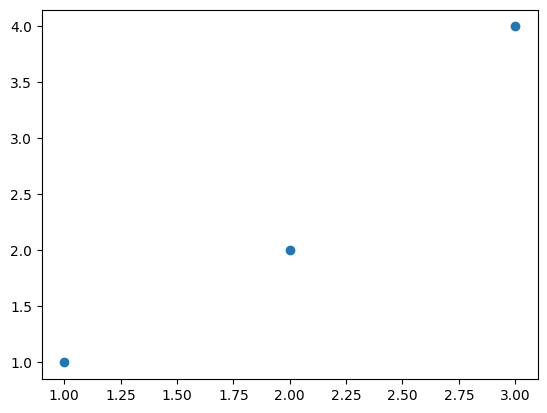

In [2]:
x = np.array([1, 2, 3])
y = np.array([1, 2, 4])
plt.scatter(x, y);

Since the three vectors are not in the same span, this means that there's no single value (call it $m$) that makes $y = mx$. In other words, you can't represent $y$ as a linear combination of $x$. **BUT**, we can find the projection of $x$ onto $y$:

$$p = mx$$

Using the same process as before:

$$p = \frac{x^Ty}{x^Tx}x \rightarrow m = \frac{x^Ty}{x^Tx} = \frac{17}{14}$$

In other words, we found *a* line of best fit for these points, using projections: $y = \frac{17}{14}x$.

What's undesirable about this line, and might mean it's not *the* line of best fit though? **No intercept!**. How to solve this? We add what we call a "bias" (or, "intercept") term to $x$ to turn it into a matrix:

$$X = \begin{bmatrix} 1 & 1 \\ 1 & 2 \\ 1 & 3 \end{bmatrix}$$

If everything else remains the same, what happens?

$$p = Xm$$

Where $m$ is now a $2\times 1$ vector instead of a single constant:

$$p = X\left[(X^TX)^{-1}X^Ty\right] \rightarrow m = (X^TX)^{-1}X^Ty = \cdots \text{ see below } \cdots = \begin{bmatrix} \frac{-2}{3} \\ 1.5 \end{bmatrix}$$

In [3]:
X = np.array([[1, 1],
              [1, 2],
              [1, 3]])
XtXinv = np.linalg.inv(np.matmul(X.T, X))
m = np.matmul(XtXinv, np.matmul(X.T, y))
m

array([-0.66666667,  1.5       ])

What does this vector represent? It represents the (respectively) **intercept** and **slope** of the line of best fit through the points:

$$y = \frac{-2}{3} + 1.5x$$

(See what happens if you flip the columns around above...)

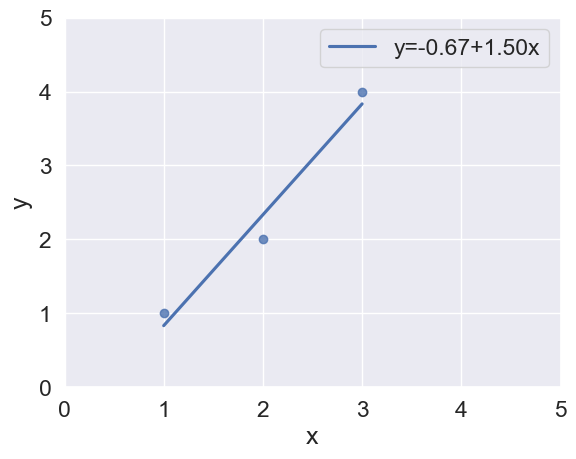

In [4]:
# seaborn's regplot will add the line for us, as long as the data are in a data frame
sns.set(font_scale=1.5)
silly_df = pd.DataFrame({'x': x,
                         'y': y})
plot = sns.regplot(data=silly_df, x='x', y='y', fit_reg=True, ci=None, line_kws={'label':"y={1:.2f}+{0:.2f}x".format(1.5,-.667)});
plot.set(xlim=(0,5), ylim=(0, 5));
plot.legend();

## Ethics in Machine Learning

Before getting into our first ML algorithm, let's discuss some important ideas that we need to keep in mind as we proceed. Though some of these ideas may seem obvious, they are not trivial and deserve our time.

What are some situations where ML is used in real life, where the use of the algorithm may pose ethical issues?

- Self-driving cars
- Facial recognition
- Speech recognition
- Financial analysis
- Government policy

What is a stereotype?

- A generalization of a group based on **one or few example(s)/identity/cultural assumptions**
- Stereotypes can be: negative, neutral, or positive but all raise concerns and can be harmful
  - Denial of services because of stereotype (either negative or positive)
  - Alienate people
  - Lead to discrimination in hiring
  - Make assessing health care more difficult

In data science, there are multiple types of bias, both technical (response, non-response, sampling) and non-technical. Non-technical biases include:

- A **representational bias** is when a system detracts from the representation of certain groups and their identities
  - Ex: Google translate (though excellent) may not quite work for some languages where the pronouns are not flexible. Try translating "She is a doctor" to Akan, then back to English using Google translate. What happens?
- An **allocative/allocation bias** is when a system unfairly allocates resources to certain group(s) over others.

Neither of these are necessarily easy to identify, but can have severe impacts on people's lives, and must be considered when building ML models with real data.

We like to think because ML is built upon mathematics that it is unbiased, but humans make choices about how to collect/classify data that is fed to these models, and it is **very difficult** to make sure data are unbiased. Data are not produced in a vacuum.

## Lecture Break/Exercise
### Machine Learning Ethics Debate 

**Rules**
- Group up into groups with 4 people on each (maybe your project group)
- Each group pick one of the prompts below and split the group up into two teams.
- 2 per team, spend 5-10 minutes:
  - Team A: list at least 2 (preferably more) specific major ethics issues (incl. potential biases) you think are **capable** of being addressed about the prompt.
  - Team B: list at least 2 (preferably more) specific major ethics issues (incl. potential biases) you think are **impossible (or at least unlikely)** to be addressed given the prompt.
- Spend 5 minutes discussing in groups, seeing if there are any disagreements, coming to a consensus, etc.
- Spend 5 minutes as a class discussing.

#### Prompts

1. You are working for Northeastern University and the admissions office has decided to implement a machine learning algorithm that will review student applications and make admission decisions. They argue that this system will be much more unbiased than when human admissions officers reviewed applications. They give you all the historical admission data they have (of all the students who have applied and been admitted/not admitted) and ask you to build the model using that data. ([Some universities are already doing something like this](https://rossier.usc.edu/news-insights/news/balancing-potentials-and-pitfalls-ai-college-admissions))
2. You are working in the criminal justice system, and one of your supervisors has been working on a machine learning algorithm that will predict the risk associated with criminals committing future crimes. They say that they have used all the data in the criminal booking system, and so they believe that since the model is trained on such a large amount of data, it should be reliable. ([You might imagine how they could be wrong](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing))
3. Your first job is as an intern at Google (exciting!) and in your role as a data scientist you are tasked with helping to create a hate speech filter for social media companies interested in keeping their platforms inclusive and welcoming to all. They have a prototype for the model and would like you to improve it. ([You may have to think critically about what data to train it on](https://www.forbes.com/sites/nicolemartin1/2019/08/13/googles-artificial-intelligence-hate-speech-detector-is-racially-biased/))

## Types of Supervised Machine Learning

Aside from simply the breadth of models we listed above, there are numerous types/goals of ML algorithms. Two of the main types are:

- Classification: when the goal of an algorithm is to predict the *categorical label* of a feature
- Regression: when the goal of an algorithm is to predict the *numeric value* of a feature

We will begin with **regression** to predict the value of a numeric feature with other numeric features characterized as vectors. We have already developed the math behind the simplest of the regression models, **simple linear regression (or, ordinary least squares, OLS)**, the line of best fit:

In [5]:
x = np.array([1, 2, 3])
X = np.array([[1, 1],
              [1, 2],
              [1, 3]])
y = np.array([1, 2, 4])
XtXinv = np.linalg.inv(np.matmul(X.T, X))
m = np.matmul(XtXinv, np.matmul(X.T, y))
m

array([-0.66666667,  1.5       ])

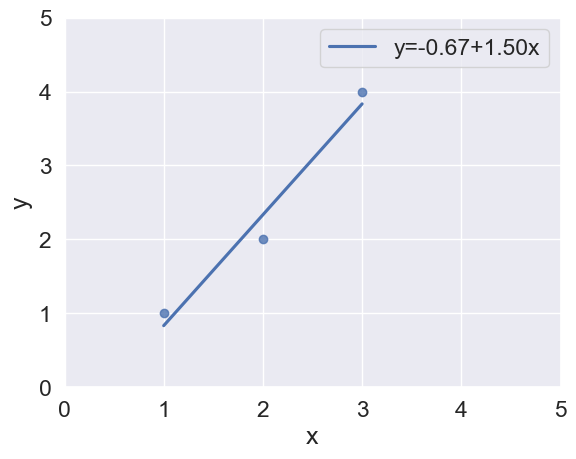

In [6]:
# one option for plotting is seaborn's regplot, which will add the line for us, as long as the data are in a data frame
sns.set(font_scale=1.5)
silly_df = pd.DataFrame({'x': x,
                         'y': y})
plot = sns.regplot(data=silly_df, x='x', y='y', fit_reg=True, ci=None, line_kws={'label':"y={1:.2f}+{0:.2f}x".format(1.5,-.667)});
plot.set(xlim=(0,5), ylim=(0, 5));
plot.legend();

## With Real Data

So, let's take a look at how this can work so quickly with a couple real data sets.

Here are a couple data sets you've seen: the Korean Demographic data set and the Electric Vehicle data set:

In [7]:
# read in the data, clean it, remove Whole country, discard time and just do Seoul, and scale
df_korea = pd.read_csv('korea_demo.zip')
df_korea['Date'] = pd.to_datetime(df_korea['Date'], format = '%m/%d/%Y')
bool_nocountry = df_korea['Region'] == 'Seoul'
df_korea_new = df_korea.loc[bool_nocountry, :]
col_num_list = ['Birth', 'Birth_rate', 'Death', 'Death_rate', 'Divorce', 'Divorce_rate', 'Marriage', 'Marriage_rate', 'Natural_growth', 'Natural_growth_rate']
df_korea_num = df_korea_new.loc[:, col_num_list]
# by subtracting each feature by the mean and dividing by the standard deviation, outputs will be "unit invariant"
df_korea_num_scaled = pd.DataFrame()
for feat in df_korea_num.columns:
    df_korea_num_scaled[f'{feat}_scaled'] = ((df_korea_num[feat] - df_korea_num[feat].mean()) / df_korea_num[feat].std()).round(3)

df_korea_num_scaled.head()

Birth_scaled  Birth_rate_scaled  Death_scaled  Death_rate_scaled  \
15         3.017              2.990         1.173              0.574   
33         2.458              2.843        -0.605             -0.286   
51         2.801              2.753        -0.231             -0.458   
69         1.926              2.033        -0.640             -0.630   
87         1.944              1.854        -0.989             -1.145   

    Divorce_scaled  Divorce_rate_scaled  Marriage_scaled  \
15           0.032               -0.167            0.963   
33           0.212                0.260            0.138   
51           1.196                1.115            0.963   
69           0.222                0.260            0.884   
87           0.670                0.474            2.111   

    Marriage_rate_scaled  Natural_growth_scaled  Natural_growth_rate_scaled  
15                 0.859                  2.452                       2.369  
33                 0.288                  2.287                       2.448  
51                 0.859                  2.521                       2.409  
69                 0.923                  1.823                       1.855  
87                 2.066                  1.904                       1.815

In [8]:
df_penguin = sns.load_dataset('penguins')
df_penguin.dropna(axis=0, inplace=True)
col_num_list = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
df_penguin_num = df_penguin.loc[:, col_num_list]

df_penguin_num_scaled = pd.DataFrame()
for feat in df_penguin_num.columns:
    df_penguin_num_scaled[f'{feat}_scaled'] = (df_penguin_num[feat] - df_penguin_num[feat].mean()) / df_penguin_num[feat].std()

#Add back in the categorical features
df_penguin_cat_onehot = pd.get_dummies(df_penguin, columns=['species', 'island', 'sex'], dtype='float', drop_first = True).iloc[:,4:]

final_penguin = pd.concat([df_penguin_num_scaled, df_penguin_cat_onehot], axis=1)
final_penguin.head()

bill_length_mm_scaled  bill_depth_mm_scaled  flipper_length_mm_scaled  \
0              -0.894695              0.779559                 -1.424608   
1              -0.821552              0.119404                 -1.067867   
2              -0.675264              0.424091                 -0.425733   
4              -1.333559              1.084246                 -0.568429   
5              -0.858123              1.744400                 -0.782474   

   body_mass_g_scaled  species_Chinstrap  species_Gentoo  island_Dream  \
0           -0.567621                0.0             0.0           0.0   
1           -0.505525                0.0             0.0           0.0   
2           -1.188572                0.0             0.0           0.0   
4           -0.940192                0.0             0.0           0.0   
5           -0.691811                0.0             0.0           0.0   

   island_Torgersen  sex_Male  
0               1.0       1.0  
1               1.0       0.0  
2               1.0       0.0  
4               1.0       0.0  
5               1.0       1.0

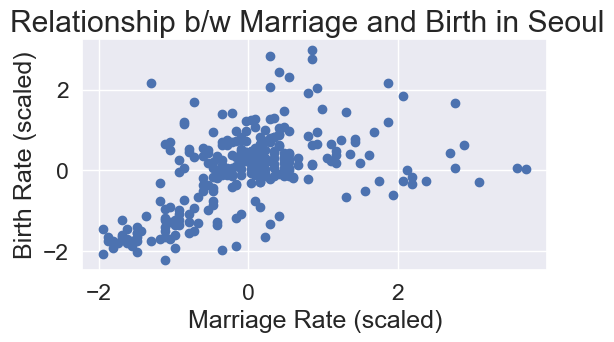

In [9]:
plt.scatter(df_korea_num_scaled['Marriage_rate_scaled'], df_korea_num_scaled['Birth_rate_scaled'])
plt.xlabel('Marriage Rate (scaled)')
plt.ylabel('Birth Rate (scaled)')
plt.suptitle('Relationship b/w Marriage and Birth in Seoul')
plt.gcf().set_size_inches(6, 3)

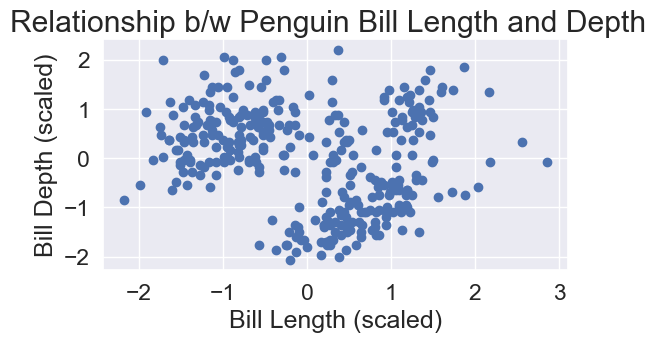

In [10]:
plt.scatter(final_penguin['bill_length_mm_scaled'], final_penguin['bill_depth_mm_scaled'])
plt.xlabel('Bill Length (scaled)')
plt.ylabel('Bill Depth (scaled)')
plt.suptitle('Relationship b/w Penguin Bill Length and Depth')
plt.gcf().set_size_inches(6, 3)

### What do you think?

It looks like a line may be a reasonable thing to fit to the first data, but maybe not the second (we'll talk more about how to check if it's *not* a reasonable thing shortly), so let's do it!

In [11]:
# notice that to include my bias column conveniently, I first create the transpose of X
X = np.array([[1] * len(df_korea_num_scaled),
              df_korea_num_scaled.Marriage_rate_scaled]).T
y = np.array(df_korea_num_scaled.Birth_rate_scaled)
X[0:5,]

array([[1.   , 0.859],
       [1.   , 0.288],
       [1.   , 0.859],
       [1.   , 0.923],
       [1.   , 2.066]])

In [12]:
m = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, y))
np.set_printoptions(suppress=True) #this just prevents python from printing it out in inconvenient scientific notation
m

array([0.0000381 , 0.51104287])

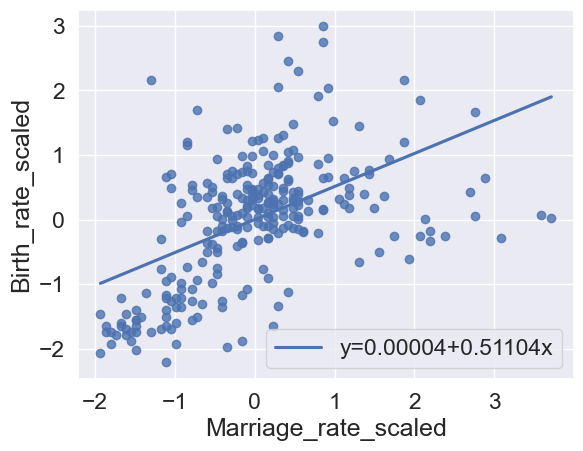

In [13]:
plot = sns.regplot(data=df_korea_num_scaled, x='Marriage_rate_scaled', y='Birth_rate_scaled', fit_reg=True, ci=None, 
                   line_kws={'label':"y={1:.5f}+{0:.5f}x".format(m[1],m[0])}); # note I'm putting the intercept first, then the slope
plot.legend();

## But what is Linear Regression exactly?
### Motivation

We want to predict $y$ given that we know $x$, or at least understand the relationship between $x$ and $y$. Or, as another example, let's say a nutrition scientist is hoping to characterize the relationship between cholesterol and total fat with a linear regression:

In [14]:
recipe_df = pd.read_csv('big_recipe.csv')
recipe_df.dropna(axis=0, inplace=True)
recipe_df.head()

name  \
1                             Lobster Mac and Cheese   
2                         Slow Cooker Mac and Cheese   
3                    Butternut Squash Mac and Cheese   
4                Mom's Favorite Baked Mac and Cheese   
5  This Million Dollar Mac and Cheese Recipe Is '...   

                                                href  Total Fat  \
1  https://www.allrecipes.com/recipe/171001/lobst...       49.0   
2  https://www.allrecipes.com/recipe/237311/slow-...       25.0   
3  https://www.allrecipes.com/recipe/235805/butte...       15.0   
4  https://www.allrecipes.com/recipe/24321/moms-f...       33.0   
5  https://www.allrecipes.com/million-dollar-mac-...       40.0   

   Saturated Fat  Cholesterol  Sodium  Total Carbohydrate  Dietary Fiber  \
1           30.0        218.0  1113.0                55.0            3.0   
2           15.0         99.0   524.0                34.0            1.0   
3            9.0         44.0   286.0                27.0            3.0   
4           21.0        100.0  1194.0                37.0            2.0   
5           23.0        112.0   988.0                32.0            2.0   

   Protein  Vitamin C  Calcium  Iron  Potassium  Total Sugars           query  
1     61.0        2.0   1189.0   3.0      687.0           6.0  mac and cheese  
2     18.0        0.0    368.0   2.0      229.0           5.0  mac and cheese  
3     13.0        9.0    336.0   1.0      303.0           4.0  mac and cheese  
4     28.0        1.0    643.0   2.0      287.0           5.0  mac and cheese  
5     28.0        1.0    773.0   2.0      273.0           7.0  mac and cheese

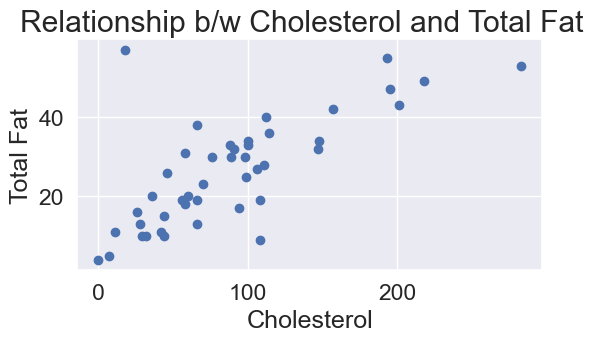

In [15]:
plt.scatter(recipe_df['Cholesterol'], recipe_df['Total Fat'])
plt.xlabel('Cholesterol')
plt.ylabel('Total Fat')
plt.suptitle('Relationship b/w Cholesterol and Total Fat')
plt.gcf().set_size_inches(6, 3)

It definitely **seems** like the more cholesterol a recipe has, the more total fat it tends to have, but can we **model** this relationship, to be able to truly characterize it?

# What is the model?
## Simple linear regression (Ordinary Least Squares)

Simple linear regression seeks to find coefficients $b_0, b_1$ so that the function:

$$ \hat{y} = b_0 + b_1 x $$

is able to predict $y$ from $x$.

* $x$ is our input data 
    - (cholesterol)
* $y$ is the outcome we're predicting 
    - (total fat)

To learn the function we 
1. observe paired observations of $(x, y)$ 
1. find and interpret the $b_i$ coefficients which best map $x$ to $y$

**Translate this from our linear algebra:**

- $x$, our input data, is the **second column** of our design matrix: e.g. $X = \begin{bmatrix} 1 & 218 \\ 1 & 99 \\ \vdots & \vdots \end{bmatrix}$
- $y$, our outcome, is **unchanged**; the $y$ vector: e.g. $y = \begin{bmatrix} 49 \\ 25 \\ \vdots \end{bmatrix}$
- The resulting **coefficient vector** from the line of best fit contains our intercept and slope: $(X^TX)^{-1}X^Ty = b = \begin{bmatrix} b_0 \\ b_1 \end{bmatrix}$
- The predicted outcome, $\hat{y}$ is the **projection** of $y$ to the span of $X$: $\hat{y} = Xb$

In [16]:
# notice that to include my bias column conveniently, I first create the transpose of X
# vector x
x = recipe_df.Cholesterol
# design matrix X
X = np.array([[1] * len(recipe_df),
              x]).T
y = np.array(recipe_df['Total Fat'])
X[0:5,]

array([[  1., 218.],
       [  1.,  99.],
       [  1.,  44.],
       [  1., 100.],
       [  1., 112.]])

In [17]:
b = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, y))
np.set_printoptions(suppress=True) #this just prevents python from printing it out in inconvenient scientific notation
b

array([11.92324826,  0.16475432])

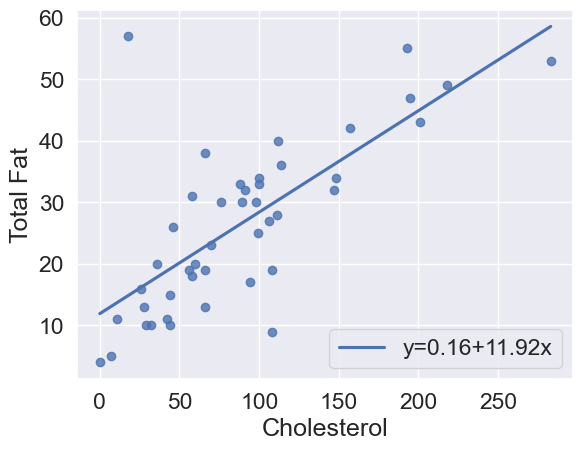

In [18]:
plot = sns.regplot(data=recipe_df, x='Cholesterol', y='Total Fat', fit_reg=True, ci=None, 
                   line_kws={'label':"y={1:.2f}+{0:.2f}x".format(b[0],b[1])}); # note I'm putting the intercept first, then slope
plot.legend();

## How does this help us "learn"? What do $b_1$ (slope) and $b_0$ (intercept) mean?

### Algebraic meaning:
- $b_1$ is the slope of the line
    - when x increases by 1, how much does y change?
- $b_0$ is the y-intercept of the line
    - when x=0, what value is y?
   
### Application meaning:
Returning to our example where:
- $x$ is the cholesterol
- $y$ is the total fat


- because $b_1$ is the increase in y when x increases by 1
    - it represents the predicted increase in total fat when a recipe's cholesterol increases by 1
- because $b_0$ is the value of y when x=0
    - it represents the predicted total fat when a recipe's cholesterol is 0
        - **Note:** in practical terms, occasionally the intercept is meaningless!

## Bigger Ideas/Different Notation (for the same model)

The way we specified the simple linear regression model above is essentially in terms only of the line of best fit. However, we should worry about whether it is appropriate at all to fit a (straight) line to the data; the model makes **assumptions** about the general behavior of the data. To provide more context for that idea, let's talk about another way of specifying the model:

$$y = X\beta + \varepsilon$$

Where $y$ and $X$ are defined as before, and we call $\beta$ the vector of **true** coefficients (i.e. that represent the true intercept, $\beta_0$ and true slope, $\beta_1$), and $\varepsilon$ is the **error** term. The previous specification is equivalent to:

$$\hat{y} = X\hat{\beta}$$

So that, $\hat{\beta} = (X^TX)^{-1}X^Ty$. However, the real benefit of specifying the model as above is twofold:

1. It re-sets our mind into thinking about the fact that the **estimated model** is based on data, and is only an estimate of the **true model**, which we can never truly know. This means that we could have multiple estimated models for the same relationship, either based on different specifications of the model (i.e. adding more $x$ features).
2. It provides some idea of, since there are **errors** even in the true model, that we should expect these errors to behave a certain way. This will help us determine if the model is adequate for describing the relationship between $X$ and $y$.

### Errors (Residuals):

$$e = y - \hat{y}$$

In [19]:
# get the residuals
res = y - np.matmul(X, b)
print(res[0:5])
round(sum(res), 1)

[ 1.16031094 -3.2339255  -4.17243815  4.60132018  9.62426839]


0.0

### Notice

To calculate the residuals, we need the predicted values, $\hat{y}$, which we got for every point by doing $Xb$. Note that this is **exactly** the projection of $y$ onto the span of $X$!

Also, the residuals will always **sum to zero**, because this is the line of **best** fit, because we have found the projection that is closest to $y$ in the span of $X$; however, that **doesn't** necessarily mean the line is a **good** line. To figure that out, we need:

### Linearity and the Gauss-Markov Assumptions

These are the key assumptions we make about the behaviour of the linear regression model. Some of these are not relevant to the simplest case we've been looking at, but come into play as we make more complicated things:

- **Linearity**: the relationship between the $x$ feature(s) and the $y$ feature is linear
  - **Note:** by specifying non-linear $x$ features to be included as linear terms, we can get around this somewhat, but the **residuals** should still follow a linear trend about 0.
- **No Multicollinearity**: the $x$ features are independent (i.e. no $x$ feature is a multiple of any other)
  - Only relevant when there are multiple $x$ features, but worth it to check since having linearly independent $x$ features will make the model **non-identifiable** (there will be more than one line of best fit)
- **Homoscedasticity**: the residuals have constant variance for any value of the $x$ features
  - There are tricks to adjust models when heteroscedasticity occurs, including simply transforming either the $x$ or $y$ feature.
- **No Autocorrelation**: the residuals are not correlated with each other

**Bonus Assumption (not technically part of the above, but often useful):**

- **Normality**
  - This is *not* a requirement for conducting linear regression, but checking to see if the residuals roughly follow a normal distribution can be helpful for assessing some issues related to the other assumptions.

### Linearity

This is an obvious one, and usually pretty easy to check: you should only fit a **linear** model to a data set if it looks like the data follow a linear trend and not some other trend.

Which of these two relationships looks more like a straight line?

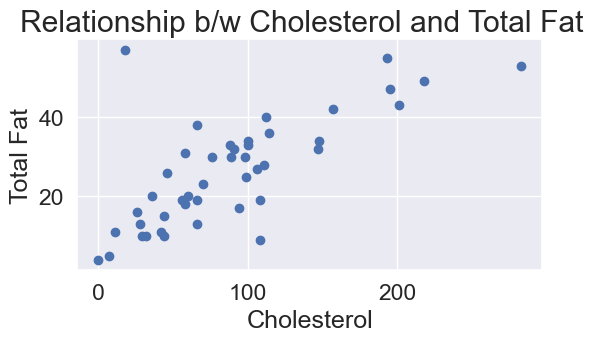

In [20]:
plt.scatter(recipe_df['Cholesterol'], recipe_df['Total Fat'])
plt.xlabel('Cholesterol')
plt.ylabel('Total Fat')
plt.suptitle('Relationship b/w Cholesterol and Total Fat')
plt.gcf().set_size_inches(6, 3)

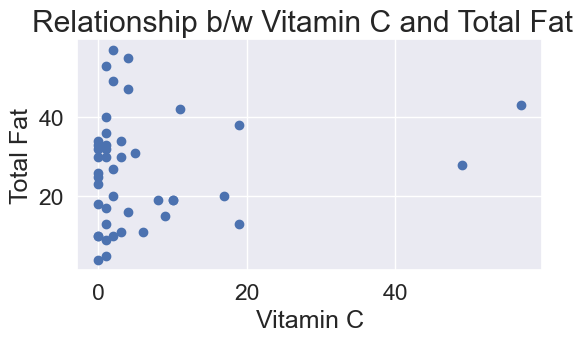

In [21]:
plt.scatter(recipe_df['Vitamin C'], recipe_df['Total Fat'])
plt.xlabel('Vitamin C')
plt.ylabel('Total Fat')
plt.suptitle('Relationship b/w Vitamin C and Total Fat')
plt.gcf().set_size_inches(6, 3)

Probably the first, right?

### Theoretical Notation for the Behaviour of Residuals

$$\varepsilon \overset{\mathrm{iid}}{\sim} N(\mu = 0, \sigma)$$

- the $\mathrm{iid}$ covers the no autocorrelation assumption
- the $N$ covers the normality assumption (not required, but convenient)
- the $\sigma$ represents the variance of the residuals, which is constant 

This is motivated by defining the line of best fit in a more data science-y way (rather than a linear algebra way). Because we will almost always be using data collected by a sample, we usually say that the observed line:

$$\hat{y} = X\vec{b}$$

with errors $\vec{e} = \vec{y} - \hat{y}$ is the estimate of the true line that would pass through all points in the population:

$$\vec{y} = X\vec{\beta} + \vec{\varepsilon}$$

Note that thus $\vec{b}$ is the vector of coefficients that estimates the true coefficients $\vec{\beta}$, which are unobserved.

Since we assume that $\varepsilon \overset{\mathrm{iid}}{\sim} N(\mu = 0, \sigma)$, then this implies that:

$$\vec{y} \overset{\mathrm{iid}}{\sim} N(\mu = X\beta, \sigma)$$

In other words, each observation of $Y$ is a Normal random variable with mean defined by their $X$ value(s) and same standard deviation.

### How to check assumptions easily

With plots! Specifically **residual plots**. Any plot that uses the residuals is technically called a residual plot, but there are three* specific ones we can use to help us in assessing the assumptions:

- $x$ feature(s) vs. $e$ plots
  - Can help us assess both linearity and homoscedasticity
  - If there is anything besides a random line of points across zero, one of those assumptions is violated
- ordered $e$ plot
  - One of the ways to assess no autocorrelation; again, any patterns suggest the assumption is violated
- histogram of $e$ (or, if you're feeling fancy, a QQ-plot)
  - either of these can help you check that your residuals are generally symmetric about zero (i.e. roughly normal).

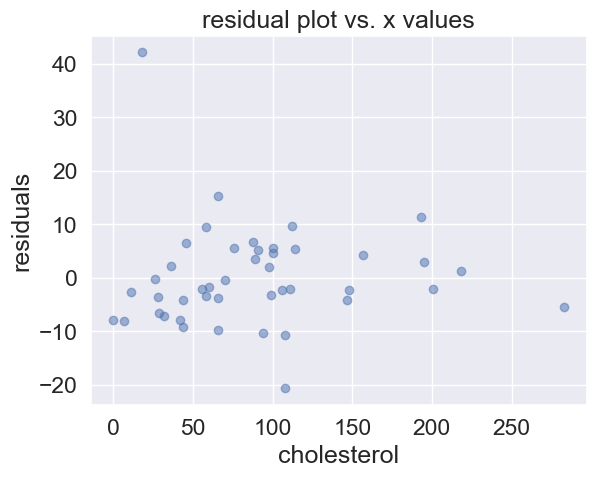

In [22]:
# for predicting total fat with cholesterol
# x values versus residuals
plt.scatter(x, res, alpha=0.5)
plt.xlabel("cholesterol")
plt.ylabel("residuals")
plt.title("residual plot vs. x values")
plt.show()

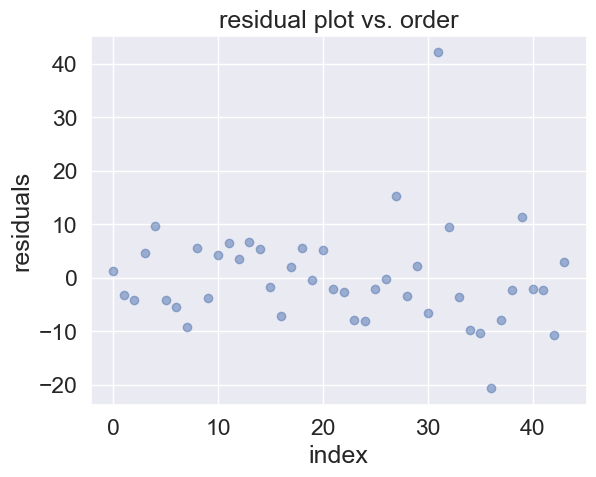

In [23]:
# residuals versus order
plt.scatter(range(len(x)), res, alpha=0.5)
plt.xlabel("index")
plt.ylabel("residuals")
plt.title("residual plot vs. order")
plt.show()

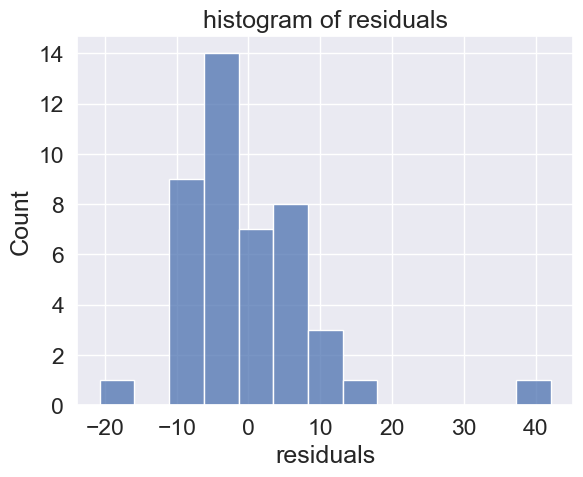

In [24]:
# histogram of residuals
sns.histplot(res, kde=False)
plt.xlabel("residuals")
plt.title("histogram of residuals")
plt.show()

In fact, in this case our simple linear model is a bit suspicious! While linearity may be reasonable:

- There is a very impactful **outlier** (maybe not an assumption, but should be dealt with)
- There may be some **funneling** of the residuals (smaller residuals for smaller $x$-values; violates constant variance)
- There doesn't appear to be autocorrelation, but **use your brain**, some of the residuals are mac and cheese, some are lobster bisque, and others are pizza; there is a feature (type of recipe) that we are not accounting for, so the residuals are actually **not** independent.
- We also note that the residuals are right skewed and not really centered about zero...

## What to do? Clearly there is *some* relationship, how can we capture it correctly?

- First, try to understand the oultier
  - If the observation **definitely belongs** in the data (i.e. it is not due to mismeasurement, and is properly part of the population), there's nothing you can do, you have to leave it :(
    - In this case, I checked because I thought the recipe may have had either Total Fat or Cholesterol in different units, but it's the same! We need to keep it.
  - If the observation **does not belong** (was from a mistake in measurement, data collection, or is not part of the population), you can either try to correct it or remove it.
- Then, try including more information (multiple regression). For example, what if we include protein and query (after making it a dummy):

In [25]:
recipe_df.tail()

name  \
52      Lobster Bisque from Scratch   
53  The Best Easy Shrimp Enchiladas   
54         Lobster and Chive Bisque   
55    Easy Imitation Lobster Bisque   
56        Crabmeat Bisque Made Easy   

                                                 href  Total Fat  \
52  https://www.allrecipes.com/recipe/283353/lobst...       55.0   
53  https://www.allrecipes.com/the-best-easy-shrim...       28.0   
54  https://www.allrecipes.com/recipe/12868/lobste...       27.0   
55  https://www.allrecipes.com/recipe/285512/easy-...       19.0   
56  https://www.allrecipes.com/recipe/237464/crabm...       47.0   

    Saturated Fat  Cholesterol  Sodium  Total Carbohydrate  Dietary Fiber  \
52           35.0        193.0  1087.0                18.0            1.0   
53           14.0        111.0  1007.0                39.0            3.0   
54           17.0        106.0   799.0                12.0            0.0   
55           12.0        108.0  1298.0                14.0            2.0   
56           29.0        195.0   459.0                14.0            1.0   

    Protein  Vitamin C  Calcium  Iron  Potassium  Total Sugars           query  
52     16.0        4.0     84.0   1.0      540.0           2.0  lobster bisque  
53     26.0       49.0    414.0   3.0      457.0           5.0  lobster bisque  
54     10.0        2.0    188.0   0.0      309.0           6.0  lobster bisque  
55     17.0        8.0     80.0   1.0      314.0           6.0  lobster bisque  
56     17.0        4.0    211.0   1.0      500.0           2.0  lobster bisque

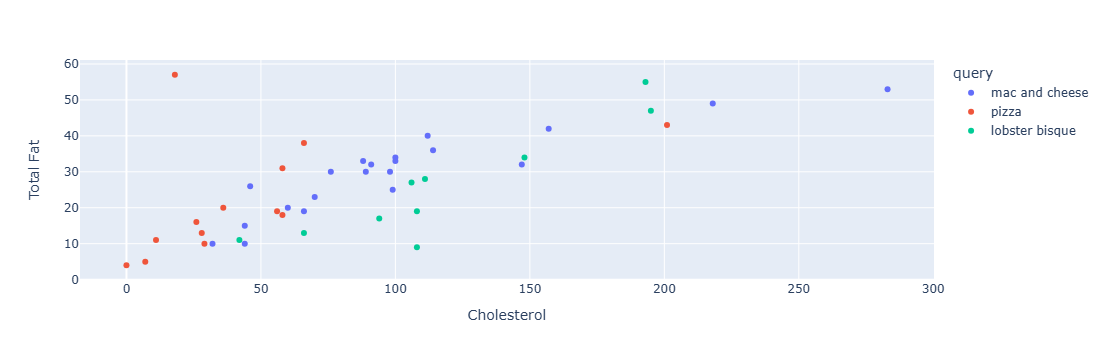

In [26]:
px.scatter(recipe_df, x = 'Cholesterol', y = 'Total Fat', color = 'query', hover_data=['href'])

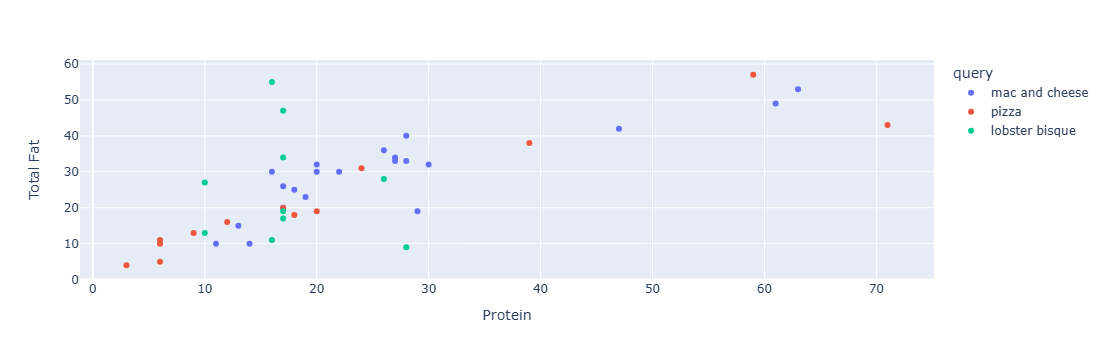

In [27]:
px.scatter(recipe_df, x = 'Protein', y = 'Total Fat', color = 'query', hover_data=['href'])

In [28]:
query_dummies = pd.get_dummies(recipe_df, columns=['query'], drop_first = True)
queryX = np.array(query_dummies.iloc[:,-2:]).astype('int')
queryX

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]])

In [29]:
add_protein = recipe_df.Protein.to_numpy().reshape(-1,1)
# since we have two numeric X values, we should scale them!
# first scale Cholesterol (wihin the X matrix)
X[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()
add_protein_scaled = (add_protein - add_protein.mean())/add_protein.std()
X_new = np.concatenate([X, add_protein_scaled, queryX], axis=1)
X_new

array([[ 1.        ,  2.14140212,  2.46116884,  1.        ,  0.        ],
       [ 1.        ,  0.17189896, -0.33219135,  1.        ,  0.        ],
       [ 1.        , -0.73837561, -0.65700068,  1.        ,  0.        ],
       [ 1.        ,  0.1884494 ,  0.31742729,  1.        ,  0.        ],
       [ 1.        ,  0.38705477,  0.31742729,  1.        ,  0.        ],
       [ 1.        ,  0.9663204 , -0.20226763,  1.        ,  0.        ],
       [ 1.        ,  3.21718116,  2.59109257,  1.        ,  0.        ],
       [ 1.        , -0.73837561, -0.78692441,  1.        ,  0.        ],
       [ 1.        ,  0.1884494 ,  0.25246543,  1.        ,  0.        ],
       [ 1.        , -0.37426578,  0.38238916,  1.        ,  0.        ],
       [ 1.        ,  1.13182487,  1.55170273,  1.        ,  0.        ],
       [ 1.        , -0.70527472, -0.39715322,  1.        ,  0.        ],
       [ 1.        ,  0.00639449, -0.20226763,  1.        ,  0.        ],
       [ 1.        , -0.01015596,  0.2

In [30]:
X_new.shape

(44, 5)

In [31]:
# new line of best fit
b_new = np.matmul(np.linalg.inv(np.matmul(X_new.T, X_new)), np.matmul(X_new.T, y))
b_new

array([24.88510166,  6.77301794,  5.59940483,  2.10492761,  2.14246517])

In [32]:
# get the residuals
res2 = y - np.matmul(X_new, b_new)

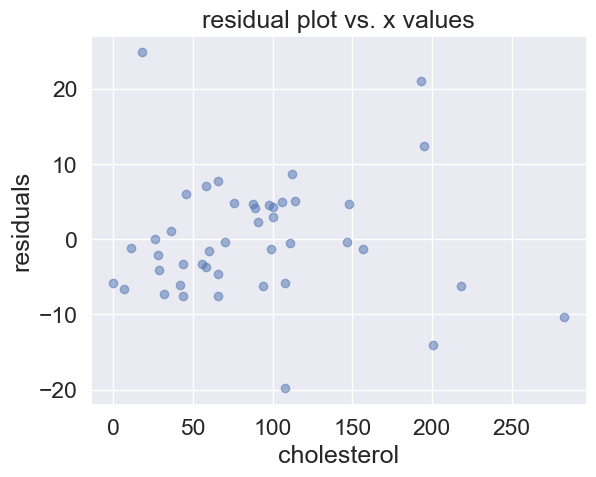

In [33]:
# for predicting total fat with cholesterol
# x values versus residuals
plt.scatter(x, res2, alpha=0.5)
plt.xlabel("cholesterol")
plt.ylabel("residuals")
plt.title("residual plot vs. x values")
plt.show()

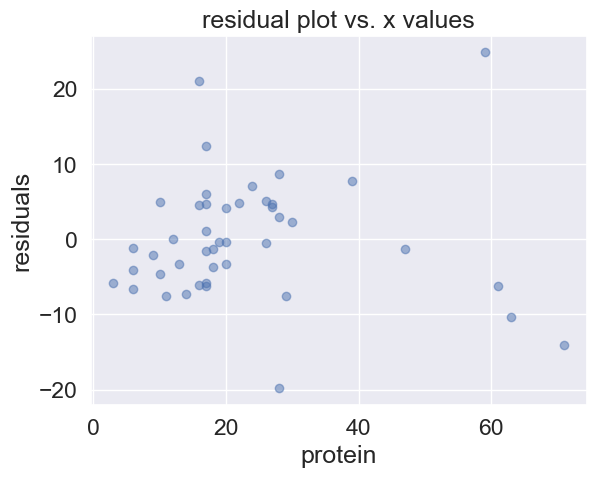

In [34]:
# for predicting total fat with protein
# x values versus residuals
plt.scatter(add_protein, res2, alpha=0.5)
plt.xlabel("protein")
plt.ylabel("residuals")
plt.title("residual plot vs. x values")
plt.show()

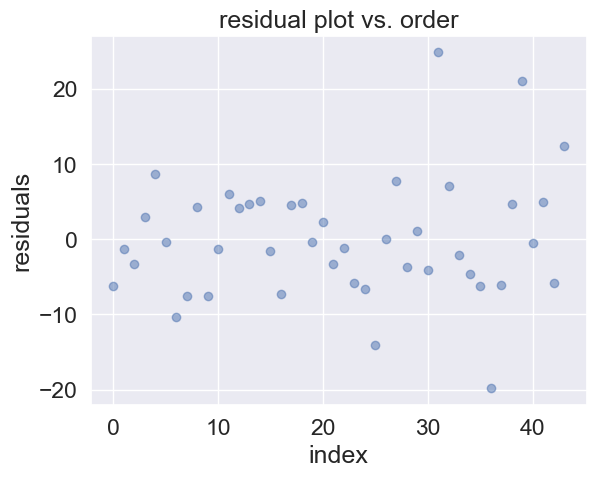

In [35]:
# residuals versus order
plt.scatter(range(len(x)), res2, alpha=0.5)
plt.xlabel("index")
plt.ylabel("residuals")
plt.title("residual plot vs. order")
plt.show()

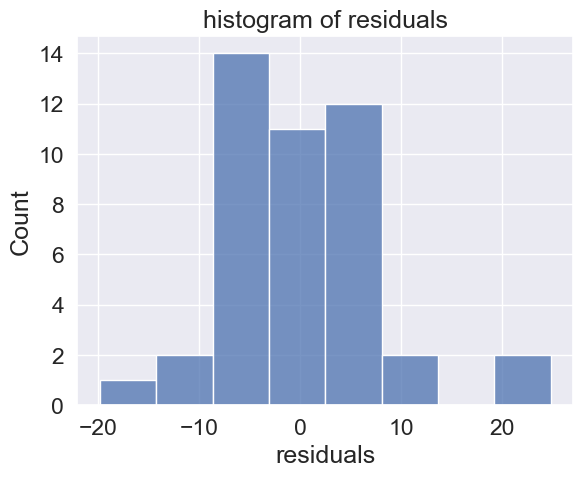

In [36]:
# histogram of residuals
sns.histplot(res2, kde=False)
plt.xlabel("residuals")
plt.title("histogram of residuals")
plt.show()

Seems to have helped the normality assumption! We also can be more confident now that the autocorrelation assumtion has been met. Still may have some nonconstant variance or linearity, but let's say it's not too bad...

However, even if everything else did look good, now we have to worry about checking **multicollinearity**, i.e. if the different $x$-features are related. If they are (i.e. if the vectors are dependent), the model will not be trustworthy. This is a bit tricky to check; you can't just check pairwise correlations between the features, because more that two $x$-features might be multicollinear. The best check is to see if changing the order of the $x$-features makes a difference.

In theory (i.e. when there isn't multicollinearity) it shouldn't:

In [37]:
# remind ourselves what b was;
b_new

array([24.88510166,  6.77301794,  5.59940483,  2.10492761,  2.14246517])

In [38]:
# fit in different order; swap Mac and Cheese and Pizza (Lobster Bisque is the baseline because it is first alphabetically)
# define function to swap columns
def swap_columns(df, col1, col2):
    """ swaps two columns of a data frame

    Args:
        df: the data frame
        col1: first column to swap
        col2: second column to swap

    Returns:
        df: the new data frame
    """
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

swap_dummies = swap_columns(query_dummies, 'query_pizza', 'query_mac and cheese')
# remake X matrix
queryX = np.array(swap_dummies.iloc[:,-2:]).astype('int')
X_new = np.concatenate([X, add_protein_scaled, queryX], axis=1)
# redo regression
b_new = np.matmul(np.linalg.inv(np.matmul(X_new.T, X_new)), np.matmul(X_new.T, y))
# check 4rd and 5th coefficients
b_new

array([24.88510166,  6.77301794,  5.59940483,  2.14246517,  2.10492761])

Looks good! But if we had way more **parameters** than observations, this might not be the case! This would be called **overfitting**:

## Dangers of Multicollinearity/Overfitting

If you have either way more $x$ features than $n$ data points, **or** if any of the $x$ features are dependent (multiples of each other), the model will be **unidentifiable**; if you recall from the linear algebra part, $N$ vectors of length $< N$ are guaranteed to be dependent. **Do not fit a model with more features than observations!** (there are some ways to address this, but they are again beyond the scope of the class). Multicollinearity **also occurs** when the $x$ features (even if there aren't too many of them) are **highly correlated to each other**. This once means that the model will not be reliable, because it is difficult to know if the correlated $x$ features actually each impact $y$, or if one of them impacts $y$ and the other only seems like it does because it is correlated with the $x$ that does. (Think about confounding variables).

Relatedly, we will also have **overfit** our data; overfitting happens when you include **too many** features or higher order terms in your data. This can happen even if you *don't* have multicollinearity, and means that your results are no longer **generalizable**. One way to check to see if you are overfitting is to perform **cross validation**, but before we talk about that, we should talk about:

## Comparing models

Since we could have multiple models for the same relationship, we should discuss two measures that are most common for evaluating how good a model is (and one which will come back real soon when we talk about gradient descent and baby neural networks).

- Mean squared error, $MSE$
- Coefficient of determination, $R^2$

### Mean Square Error, $MSE$

- MSE measures how closely a line (i.e. $b_1, b_0$) comes to all observations $(x, y)$
- MSE is 0 when the line goes through all points exactly
- MSE is large when the line is far from many pairs $(x, y)$

**The best fit line $(b_1, b_0)$ is the one which minimizes MSE**

$$
    MSE = \frac{1}{n}\sum_{j} {(y_j - \hat{y}_j)^2} = \frac{1}{n} \sum_{j} e_{j}^2
$$

In [39]:
# what is the MSE for the simple Cholesterol vs. Total Fat model?
MSE_1 = (res**2).mean()
MSE_1

87.60847802430521

In [40]:
# what about the more complex model with protein and all the queries included?
MSE_2 = (res2**2).mean()
MSE_2

63.60705139384283

A smaller MSE means a better model; even though the second model is still not perfect (because of the possible non-linearity and non-constant variance) it is *better* than the first, on average!

### $R^2$ is the percentage of variance of y can be explained by the model

$$R^2 = 1-\frac{MSE}{\sigma_y^2}$$

$R^2$ is the percent of variance of $y$ explained by $X$ (under model; also called the **coefficient of determination**)

Intuition:
- $R^2 = 0$
    - $X$, using this model, doesn't explain any of the variance of $y$
- $R^2 = .5$
    - $X$, using this model, explains half the variance of $y$
- $R^2 = 1$
    - $X$, using this model, explains all the differences in $y$

In [41]:
# comparing the R2
r2_1 = 1 - (MSE_1/y.var())
print(r2_1)
r2_2 = 1 - (MSE_2/y.var())
print(r2_2)

0.530762787881738
0.659316128527773


Including protein and queries also improved the $R^2$! We've definitely started on our path to understanding the Total Fat of recipes! However, be a bit careful with these measures (for a couple reasons). Let's think about $R^2$ for a second, by first examining the first model. Notice the relationship between $R^2$ and the correlation between $y$ and $yhat$ in a simple linear model:

In [42]:
# hmmm, if it's R^2, what's R?
print(np.sqrt(r2_1))
# Correlation between y and y
np.corrcoef(y, np.matmul(X, b))

0.7285346854349064


array([[1.        , 0.72853469],
       [0.72853469, 1.        ]])

In simple linear regression, $R^2$ is simply the correlation between $y$ and $\hat{y}$, squared!

## BUT WAIT

Remember that correlation requires a **linear** relationship to be meaningful; if there is some curving/non-linear trend to the relationship between the observed and predicted response, you cannot use $R^2$ meaningfully, because it is directly related to correlation. **FURTHER**, $R^2$ will **ALWAYS** get better (bigger) the **MORE** $x$-features you use to predict $y$ with, *even if you include unnecessary, nonsense or misleading $x$-features*. In other words, if you overfit, the $R^2$ of the full model won't be able to tell you (in fact, it will just tell you that the model is even better than before).

## Enter: Cross Validation

Cross validation is an important tool for assessing model performance in **ALL** supervised machine learning methods. Let's explore it (and also introduce `sklearn`'s `LinearRegression` function).

### Types of Cross Validation

There are several different strategies for determining how well your model will perform on new data, but they all generally follow this framework:

- Break up your data into two subsets (call them the *training* and *test* sets)
- Fit your candidate model(s) on the *training* set
- Evaluate how that model does in predicting the *test* set

In other words, you pretend that some of your data is "new", and that you don't immediately know the response feature. This allows you to figure out in a more systematic (trustworthy) way how the model performs.

### How to break up your data

There are several different strategies. The two most common (and sort of on opposite extremes):

- Single-fold Cross Validation
  - Make a 60-40, or 70-30, or 80-20 split of your data into training-test sets. Run the model once on the training set, predict the test set once.
- Leave-one-out Cross Validation (LOO-CV)
  - Loop through the data and leave out a single observation to test, including all the other observations in the training set. I.e. if you have $n$ observations, you are running the model $n$ times, once for each observation that you leave out and then predict.
 
Even though LOO-CV is probably the best way to approach Cross Validation in general, Single-fold Cross Validation is most often used when you have **a lot** of data, and so running the model once for each observation is going to be time consuming (and, if you have enough data, you won't lose too much in terms of insight). With smaller data sets (say, less than a few hundred), LOO-CV shouldn't take too long and can make your insight to the model's performance much more trustworthy. There are also strategies in-between these two ($k$-fold Cross Validation, where you break up your data into $k$ sets, looping through each as a test set while treating the rest as the training set; LOO-CV is a special case of this when $k=n$).

How does it work:

In [43]:
# Single-fold cross validation
crossval = train_test_split(X_new, 
                            y,
                            test_size=0.3,
                            random_state=3)

Xtrain, Xtest, ytrain, ytest = crossval

In [44]:
Xtrain.shape, ytrain.shape

((30, 5), (30,))

In [45]:
Xtest.shape, ytest.shape

((14, 5), (14,))

In [46]:
from sklearn.linear_model import LinearRegression

# Single-fold cross validation
crossval = train_test_split(X_new, 
                            y,
                            test_size=0.3)

Xtrain, Xtest, ytrain, ytest = crossval

# first demonstrate the usage by fitting the full model
# set up both models using scikit-learn
modelA = LinearRegression()
modelB = LinearRegression()

# note that scikit-learn does not require (in fact, does not accept) the bias column
# (it makes it's own; you'll also write a function that does this on the homework)
modelA.fit(Xtrain[:,1].reshape(-1, 1), ytrain)
modelB.fit(Xtrain[:,1:].reshape(-1, 4), ytrain)

predA = modelA.predict(Xtest[:,1].reshape(-1,1))
predB = modelB.predict(Xtest[:,1:].reshape(-1,4))

resA = ytest - predA
resB = ytest - predB

MSE_A = (resA**2).mean()
MSE_B = (resB**2).mean()

r2_A = 1 - (MSE_A)/(ytest.var())
r2_B = 1 - (MSE_B)/(ytest.var())

print(r2_A)
print(r2_B)

0.6646842651941909
0.38669860581316595


## Implement LOO-CV

To properly compare models, we should find $R^2$ and compare on **cross validated** data like above. When we have a small data set, **LOO-CV** is probably preferred:

In [47]:
# set up the array of predictions to fill out
y_predsA = np.empty(len(y))

# loop through each observation
for obs in range(len(y)):
    # the below excludes the single row/true y belonging to obs as well as the bias column
    loocv_trainX = np.concatenate((X_new[:obs, 1].reshape(-1,1), X_new[obs+1:, 1].reshape(-1,1)))
    loocv_trainy = np.concatenate((y[:obs], y[obs+1:]))
    # then train the model
    loocv_regress = LinearRegression()
    loocv_regress.fit(loocv_trainX, loocv_trainy)
    # and predict the held out observation (and store it)
    y_predsA[obs] = loocv_regress.predict(X_new[obs,1].reshape(-1,1))[0]

# using sklearn to calculate R2
from sklearn.metrics import r2_score
print(r2_score(y, y_predsA)) #notice this is just *slightly* smaller than the full model R2
# and get the MSE
print(((y - y_predsA)**2).mean())

0.4836718978539497
96.40053691818657


In [48]:
# now for Model B
y_predsB = np.empty(len(y))

# loop through each observation
for obs in range(len(y)):
    # the below excludes the single row/true y belonging to obs as well as the bias column
    loocv_trainX = np.concatenate((X_new[:obs, 1:].reshape(-1,4), X_new[obs+1:, 1:].reshape(-1,4)))
    loocv_trainy = np.concatenate((y[:obs], y[obs+1:]))
    # then train the model
    loocv_regress = LinearRegression()
    loocv_regress.fit(loocv_trainX, loocv_trainy)
    # and predict the held out observation (and store it)
    y_predsB[obs] = loocv_regress.predict(X_new[obs,1:].reshape(-1,4))[0]

print(r2_score(y, y_predsB)) #not all that smaller, but... more smaller? seems we're at least not overfitting too much!
print(((y - y_predsB)**2).mean())
#not actually as good as the simpler mode! but remember that accounting for query is important for helping with the independence assumption

0.35320440949989673
120.75934263769467


## Regression Wrap Up

The last type of regression is polynomial regression, which I will leave mainly as an exercise on Homework 4, but to briefly explain: you can simply add higher order terms of $x$ features to the $X$ matrix to account for non-linear trends in the data. For example, to fit a quadratic curve:

$$
y = b_0 + b_1x + b_2x^2
$$

Where: $X = \begin{bmatrix} 1 & x_1 & x_1^2 \\ 1 & x_2 & x_2^2 \\ \vdots & \vdots & \vdots \end{bmatrix}$

And you could add more, or other $x$ features, or even **interaction** terms (this means one $x$-feature multiplied by another) as you wish (just keep in mind the issues with overfitting we **JUST** discussed!!). I'll show this very briefly below for you. You can also combine multiple and polynomial regression (include both higher order terms and multiple $x$-values) to try to improve your model.

In general, approaching a regression problem should take the form:

1. Determine which $x$ feature(s) you will use to predict your $y$ feature
   - Create your $X$ design matrix with bias column and columns for each of the $x$ feature(s)
2. Find the line of best fit coefficients and interpret: $(X^TX)^{-1}X^Ty$
3. Check the assumptions
   - If linearity is violated, determine if a polynomial relationship for one (or more) of the features makes sense
   - If constant variance is violated, determine if adding more feature(s) may help (but not too many), or if a transformation may help
   - If no autocorrelation is violated, determine if adding more feature(s) may help (but not too many), or cry (because we haven't talked about time series models)
   - Don't add too many features, or you'll definitely have multicollinearity
   - If all the assumptions look good (or at least reasonable/not too bad) keep as a candidate model
4. Whether you have only one or multiple candidate models, perform cross validation to assess the performance of the model(s) and choose the one that seems to do the best, discussing the implications of the coefficients and using it for predictions.

**FINALLY** (and this is true for all ML), remember that your model is not perfect; it could always be improved in some way! Especially think critically about what biases or confounding features may not be accounted for.

In [64]:
# Fitting a quadratic model (that still includes query) and comparing it to the Models A and B from above
# Could also use the PolynomialFeatures function (check it out here: https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
X_poly = np.concatenate([X, (X[:,1]**2).reshape(-1,1), 
                         add_protein_scaled, add_protein_scaled**2, 
                         X[:,1].reshape(-1,1)*add_protein_scaled, queryX], axis = 1)
X_poly # this has (intercept, cholesterol, cholesterol^2, protein, protein^2, cholesterol*protein, mac and cheese, pizza)

array([[ 1.        ,  2.14140212,  4.58560304,  2.46116884,  6.05735205,
         5.27035217,  0.        ,  1.        ],
       [ 1.        ,  0.17189896,  0.02954925, -0.33219135,  0.1103511 ,
        -0.05710335,  0.        ,  1.        ],
       [ 1.        , -0.73837561,  0.54519855, -0.65700068,  0.43164989,
         0.48511328,  0.        ,  1.        ],
       [ 1.        ,  0.1884494 ,  0.03551318,  0.31742729,  0.10076009,
         0.05981898,  0.        ,  1.        ],
       [ 1.        ,  0.38705477,  0.14981139,  0.31742729,  0.10076009,
         0.12286175,  0.        ,  1.        ],
       [ 1.        ,  0.9663204 ,  0.93377512, -0.20226763,  0.04091219,
        -0.19545533,  0.        ,  1.        ],
       [ 1.        ,  3.21718116, 10.35025461,  2.59109257,  6.7137607 ,
         8.33601419,  0.        ,  1.        ],
       [ 1.        , -0.73837561,  0.54519855, -0.78692441,  0.61925003,
         0.58104579,  0.        ,  1.        ],
       [ 1.        ,  0.1884494 

In [65]:
# new line of best fit
b_poly = np.matmul(np.linalg.inv(np.matmul(X_poly.T, X_poly)), np.matmul(X_poly.T, y))
b_poly # a very small quadratic term means it's probably not all that important, but let's look at the residuals

array([18.92452533, 10.63138307,  2.87834484,  4.4219593 ,  1.22816119,
       -6.99324169, 11.0700628 ,  9.39960792])

In [66]:
# get the residuals
res3 = y - np.matmul(X_poly, b_poly)

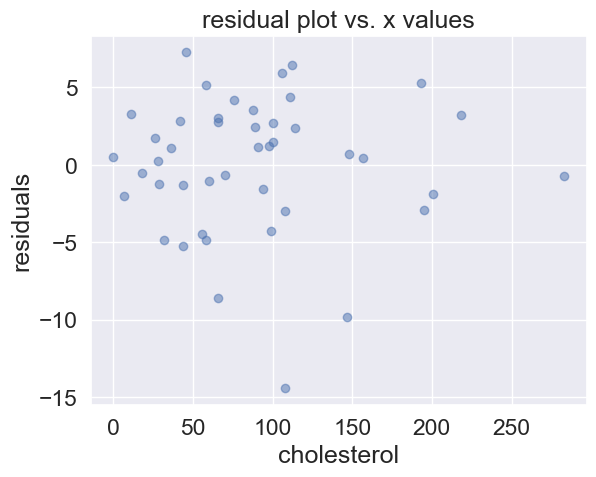

In [67]:
# for predicting total fat with cholesterol
# x values versus residuals
plt.scatter(x, res3, alpha=0.5)
plt.xlabel("cholesterol")
plt.ylabel("residuals")
plt.title("residual plot vs. x values")
plt.show()

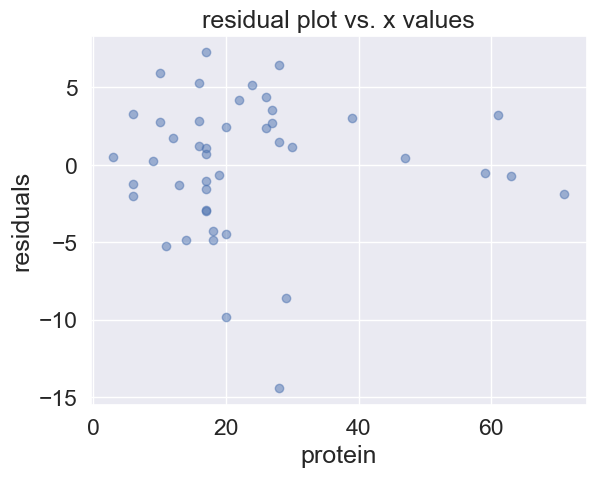

In [68]:
# for predicting total fat with protein
# x values versus residuals
plt.scatter(add_protein, res3, alpha=0.5)
plt.xlabel("protein")
plt.ylabel("residuals")
plt.title("residual plot vs. x values")
plt.show()

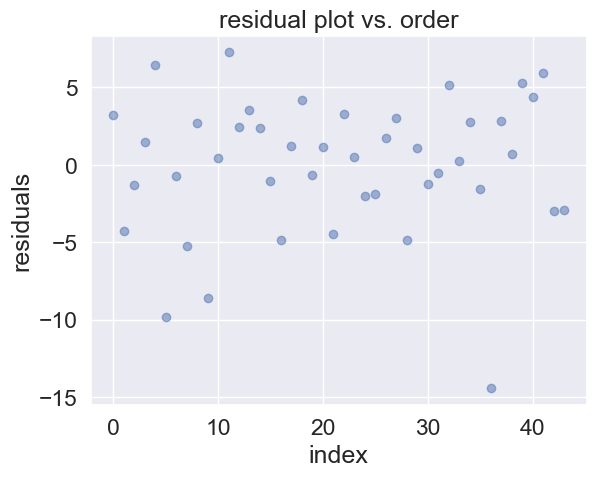

In [69]:
# residuals versus order
plt.scatter(range(len(x)), res3, alpha=0.5)
plt.xlabel("index")
plt.ylabel("residuals")
plt.title("residual plot vs. order")
plt.show()

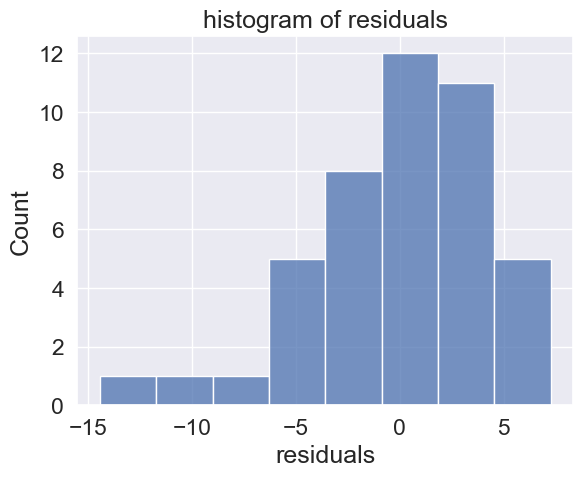

In [70]:
# histogram of residuals
sns.histplot(res3, kde=False)
plt.xlabel("residuals")
plt.title("histogram of residuals")
plt.show()

In [71]:
# what about the more complex model with all the queries included AND a quadratic cholesterol term?
# Compare it to the other models
print(f'Model A MSE: {MSE_1}')
print(f'Model B MSE: {MSE_2}')
MSE_3 = (res3**2).mean()
print(f'Model C MSE: {MSE_3}')

Model A MSE: 87.60847802430521
Model B MSE: 63.60705139384283
Model C MSE: 18.959498587758905


In [72]:
# comparing the R2
print(r2_1)
print(r2_2)
r2_3 = 1 - (MSE_3/y.var())
print(r2_3)

0.530762787881738
0.659316128527773
0.8984515829847888


In [74]:
# Do LOO-CV and properly compare the three models
# now for Model C
y_predsC = np.empty(len(y))

# loop through each observation
for obs in range(len(y)):
    # the below excludes the single row/true y belonging to obs as well as the bias column
    loocv_trainX = np.concatenate((X_poly[:obs, 1:].reshape(-1,7), X_poly[obs+1:, 1:].reshape(-1,7)))
    loocv_trainy = np.concatenate((y[:obs], y[obs+1:]))
    # then train the model
    loocv_regress = LinearRegression()
    loocv_regress.fit(loocv_trainX, loocv_trainy)
    # and predict the held out observation (and store it)
    y_predsC[obs] = loocv_regress.predict(X_poly[obs,1:].reshape(-1,7))[0]

print(r2_score(y, y_predsC))
print(((y - y_predsC)**2).mean())

0.8428003189700403
29.34981379411582


Compare the three models:

### Model 1

$$\text{total fat} = b_0 + b_1\text{cholesterol}$$

- LOO-CV $R^2 = .4837$
- Assumptions:
  - Linearity: Okay
  - Autocorrelation: Maybe okay, but we know observations are likely dependent because of query
  - Constant Variance: Seems like there may be funneling
  - Normality: Skewed right
 
### Model 2

$$\text{total fat} = b_0 + b_1\text{cholesterol} + b_2\text{protein} + b_3\text{mac and cheese} + b_4\text{pizza}$$

- LOO-CV $R^2 = .3532$
- Assumptions:
  - Linearity: Maybe okay, but seems like maybe some curving in cholesterol and protein?
  - Autocorrelation: Good, we know we've accounted for query now too
  - Constant Variance: Still maybe some funneling in both cholesterol (not changed much) and protein
  - Normality: Better
 
### Model 3

$$\text{total fat} = b_0 + b_1\text{cholesterol} + b_2\text{cholesterol}^2 + b_3\text{protein} + b_4\text{protein}^2 + b_5\text{cholesterol}\times\text{protein} + b_6\text{mac and cheese} + b_7\text{pizza}$$

- LOO-CV $R^2 = .8428$
- Assumptions:
  - Linearity: I think they look pretty good; maybe protein is a bit strange looking
  - Autocorrelation: Still good
  - Constant Variance: Decent
  - Normality: A bit worse (left skewed), but this is the least important of the assumptions
 
Which model is best? Seems pretty obvious here that Model 3 does a pretty good job. I think it meets all the assumptions best, and it definitely has the best LOO-CV $R^2$ (and, remember, this is pretty trustworthy since all the predictions are made on held out data). However, always remember **WE WILL NEVER KNOW** what the best model is. We could keep adding more features from the ones we have, but eventually we'll start overfitting or including features in ways that aren't useful (notice that the second model has more features than the first, but a worse LOO-CV $R^2$; if we were picking just between those two, we'd prefer the simpler one).

Never forget this quote from [George Box](https://en.wikipedia.org/wiki/George_E._P._Box):

```
"All models are wrong but some are useful."
```